In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [11]:
def init_params(nx, nh, ny):
    """
    Initializes weights and biases for a two-layer MLP.
    nx: number of input neurons.
    nh: number of hidden neurons.
    ny: number of output neurons.
    Returns a dictionary containing W1, b1, W2, and b2.
    """
    np.random.seed(42)  
    params = {
        'W1': np.random.normal(0, 0.3, (nh, nx)),
        'b1': np.zeros((nh, 1)),
        'W2': np.random.normal(0, 0.3, (ny, nh)),
        'b2': np.zeros((ny, 1))
    }
    return params
params = init_params(784, 128, 10)
print("init_params test:")
print("W1 shape:", params['W1'].shape)  
print("b1 shape:", params['b1'].shape)  
print("W2 shape:", params['W2'].shape)  
print("b2 shape:", params['b2'].shape)  

init_params test:
W1 shape: (128, 784)
b1 shape: (128, 1)
W2 shape: (10, 128)
b2 shape: (10, 1)


In [12]:
def tanh(x):
    return np.tanh(x)

In [13]:
def softmax(x):
    exp_x = np.exp(x - np.max(x,axis=0,keepdims=True))  
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)
 

In [14]:
def forward(params, X):
    """
    Performs forward propagation for the MLP.
    X: input data of shape (nx, nbatch)
    Returns:
        Yhat: predictions from the output layer (softmax probabilities)
        output: dictionary containing intermediate computations for backpropagation
    """
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    
    Yhat = softmax(Z2)
    
    output = {"Z1": Z1, "A1": A1, "Z2": Z2, "Yhat": Yhat}
    return Yhat, output

In [15]:
def loss_accuracy(Yhat, Y):
    """
    Computes the cross-entropy loss and classification accuracy.
    Yhat: predicted probabilities from forward propagation, shape (ny, m)
    Y: true labels in one-hot encoding, shape (ny, m)
    Returns:
        loss: cross-entropy loss (scalar)
        accuracy: classification accuracy (scalar)
    """
    m = Y.shape[1]
    epsilon = 1e-12
    loss = -np.sum(Y * np.log(Yhat + epsilon)) / m
    
    predictions = np.argmax(Yhat, axis=0)
    labels = np.argmax(Y, axis=0)
    accuracy = np.mean(predictions == labels)
    return loss, accuracy

In [16]:
def backward(X,params, output, Y):
    """
    Performs backpropagation and computes gradients.
    params: dictionary containing network parameters.
    output: dictionary containing intermediate variables from forward propagation.
    Y: true labels in one-hot encoding, shape (ny, m)
    Returns a dictionary containing gradients for W1, b1, W2, and b2.
    """
    Z1, A1, Yhat =output["Z1"], output["A1"], output["Yhat"]
    W2 = params['W2']
    m = X.shape[1]
    
    dZ2 = Yhat - Y  
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    
    dA1 = np.dot(W2.T, dZ2)  
    dZ1 = dA1 * (1 - np.tanh(Z1)**2)  
    
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [17]:
def sgd(params, grads, eta):
    """
    Updates the network parameters using mini-batch SGD.
    params: dictionary containing current network parameters.
    grads: dictionary containing computed gradients.
    eta: learning rate.
    Returns updated parameters.
    """
    params['W1'] -= eta * grads['dW1']
    params['b1'] -= eta * grads['db1']
    params['W2'] -= eta * grads['dW2']
    params['b2'] -= eta * grads['db2']
    return params

X_train shape: (784, 60000)
Y_train shape: (10, 60000)
Epoch 1/50 - Loss: 0.6866, Accuracy: 0.7950, Test Loss: 0.3887, Test Accuracy: 0.8852
Epoch 2/50 - Loss: 0.3510, Accuracy: 0.8963, Test Loss: 0.3170, Test Accuracy: 0.9065
Epoch 3/50 - Loss: 0.2925, Accuracy: 0.9131, Test Loss: 0.2808, Test Accuracy: 0.9182
Epoch 4/50 - Loss: 0.2581, Accuracy: 0.9242, Test Loss: 0.2599, Test Accuracy: 0.9250
Epoch 5/50 - Loss: 0.2339, Accuracy: 0.9315, Test Loss: 0.2442, Test Accuracy: 0.9309
Epoch 6/50 - Loss: 0.2145, Accuracy: 0.9371, Test Loss: 0.2296, Test Accuracy: 0.9346
Epoch 7/50 - Loss: 0.1994, Accuracy: 0.9417, Test Loss: 0.2180, Test Accuracy: 0.9377
Epoch 8/50 - Loss: 0.1867, Accuracy: 0.9456, Test Loss: 0.2086, Test Accuracy: 0.9390
Epoch 9/50 - Loss: 0.1753, Accuracy: 0.9488, Test Loss: 0.1996, Test Accuracy: 0.9421
Epoch 10/50 - Loss: 0.1659, Accuracy: 0.9513, Test Loss: 0.1942, Test Accuracy: 0.9438
Epoch 11/50 - Loss: 0.1573, Accuracy: 0.9542, Test Loss: 0.1869, Test Accuracy: 0.94

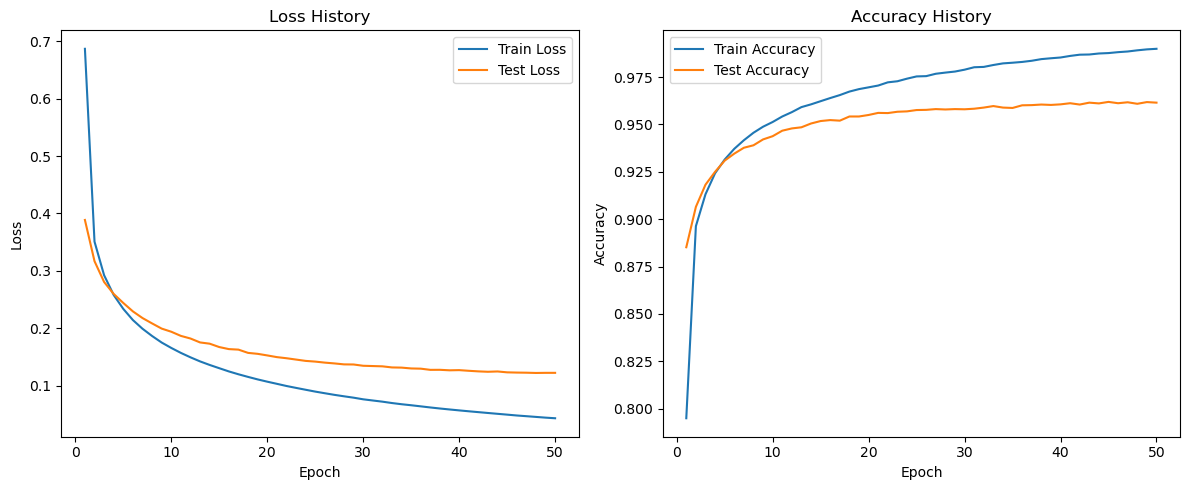

In [18]:
def train_mlp(eta=0.1, batch_size=128, epochs=50):
    """
    Trains the MLP on the MNIST dataset using the modified forward and backward functions.
    eta: learning rate.
    batch_size: size of each mini-batch.
    epochs: number of complete passes through the training data.
    """


    (X_train, y_train), (X_test, y_test) = mnist.load_data()

   
    X_train = X_train.reshape(X_train.shape[0], -1).astype(np.float32) / 255.0
    X_train = X_train.T  
    X_test  = X_test.reshape(X_test.shape[0], -1).astype(np.float32) / 255.0
    X_test  = X_test.T


    Y_train = to_categorical(y_train, num_classes=10).T
    Y_test  = to_categorical(y_test, num_classes=10).T

    
    print("X_train shape:", X_train.shape)  
    print("Y_train shape:", Y_train.shape)  

   
    nx = X_train.shape[0]  
    nh = 128              
    ny = 10               

   
    params = init_params(nx, nh, ny)

  
    train_loss_history = []
    train_acc_history = []
    test_loss_history = []
    test_acc_history = []

    m = X_train.shape[1]  

    for epoch in range(epochs):
      
        permutation = np.random.permutation(m)
        X_train_shuffled = X_train[:, permutation]
        Y_train_shuffled = Y_train[:, permutation]

        epoch_loss = 0
        epoch_acc = 0
        nbatches = m // batch_size

     
        for j in range(nbatches):
            start = j * batch_size
            end = start + batch_size
            X_batch = X_train_shuffled[:, start:end]
            Y_batch = Y_train_shuffled[:, start:end]

          
            Yhat, output = forward(params, X_batch)

       
            loss, acc = loss_accuracy(Yhat, Y_batch)
            epoch_loss += loss
            epoch_acc  += acc

            grads = backward(X_batch, params, output, Y_batch)

            params = sgd(params, grads, eta)

        epoch_loss /= nbatches
        epoch_acc  /= nbatches

        Yhat_test, _ = forward(params, X_test)
        test_loss, test_acc = loss_accuracy(Yhat_test, Y_test)

        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)
        test_loss_history.append(test_loss)
        test_acc_history.append(test_acc)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss_history, label="Train Loss")
    plt.plot(epochs_range, test_loss_history, label="Test Loss")
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_acc_history, label="Train Accuracy")
    plt.plot(epochs_range, test_acc_history, label="Test Accuracy")
    plt.title("Accuracy History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

train_mlp(eta=0.1, batch_size=128, epochs=50)
